# 혈압-혈당 데이터 분석

> "작성 중"

- toc: true
- branch: master
- badges: true
- comments: true
- author: 한재수
- categories: [python, visualization]

# 패키지 import 및 데이터 전처리

`-` 데이터 출처 : https://nhiss.nhis.or.kr/bd/ab/bdabf003cv.do

`-` 한글 깨짐 참고 : https://mirae-kim.tistory.com/14

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
# from scipy import stats
# import plotly.express as px 
# from plotnine import *
# import plotly.figure_factory as ff

fig_dims = (8, 4)  # 그래프의 출력 사이즈를 나타냄  
sns.set(rc = {'figure.figsize':fig_dims}) # plot 사이즈 및 스타일 통일
sns.set_theme() # 테마 설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # 한글이 깨지지 않도록 설정
matplotlib.rcParams['axes.unicode_minus'] = False    # 한글이 깨지지 않도록 설정

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/gkswotn9999/data/main/blood_data.csv', header = 0) ## 2013~2014년에 실시된 백만개의 국가건강검진_혈압혈당데이터

In [3]:
df.shape ## matrix는 1000000 × 7 크기

(1000000, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   SEX     1000000 non-null  int64  
 1   BTH_G   1000000 non-null  int64  
 2   SBP     1000000 non-null  int64  
 3   DBP     1000000 non-null  int64  
 4   FBS     1000000 non-null  int64  
 5   DIS     1000000 non-null  int64  
 6   BMI     1000000 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 53.4 MB


`-` 결측치는 없다

`-` 우선 열 이름을 변경하자

In [4]:
df.columns = ['성별', '연령대', '수축기혈압', '이완기혈압', '공복혈당', '고혈압_당뇨', 'BMI']

In [139]:
df.head(6)

,성별,연령대,수축기혈압,이완기혈압,공복혈당,고혈압_당뇨,BMI
0,1,1,116,78,94,4,16.6
1,1,1,100,60,79,4,22.3
2,1,1,100,60,87,4,21.9
3,1,1,111,70,72,4,20.2
4,1,1,120,80,98,4,20.0
5,1,1,115,79,95,4,23.1


`-` 변수별 요약통계량은 아래와 같다

In [138]:
df.describe().round(2)

,성별,연령대,수축기혈압,이완기혈압,공복혈당,고혈압_당뇨,BMI
count,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00,1000000.0
mean,1.49,13.91,121.87,75.79,98.86,3.47,23.8
std,0.50,7.01,14.56,9.79,22.98,0.95,3.3
min,1.00,1.00,82.00,50.00,60.00,1.00,14.8
25%,1.00,9.00,110.00,70.00,87.00,3.00,21.5
50%,1.00,14.00,120.00,76.00,94.00,4.00,23.6
75%,2.00,19.00,130.00,80.00,104.00,4.00,25.8
max,2.00,27.00,190.00,120.00,358.00,4.00,40.3


`-` 수축기혈압은 82~190의 범위를 가지고 중앙값은 120, 평균은 121.87이다

`-` 이완기혈압은 50~120의 범위를 가지고 중앙값은 76, 평균은 75.79이다

`-` 공복혈당은 60~358의 범위를 가지고 중앙값은 94, 평균은 98.86이다

`-` BMI은 14.8~40.3의 범위를 가지고 중앙값은 23.6, 평균은 23.8이다

`-` 양적변수들을 보면 중앙값과 평균이 거의 비슷한데 대칭인 분포인 것 같다 

`-` 각 변수에 대한 설명은 아래와 같다

|변수명 | 범위|비고|
|:-:|:-:|:-:|
|수축기혈압| 82-190 mmHg|상·하위 극단값 0.05% 제거|
|이완기혈압| 50-120 mmHg|〃(위와 동일함)|
|공복혈당| 60-358 mg/dL|〃|  
|BMI| 14.8-40.3 kg/m2|$\cfrac{w}{t^2}$키가 t미터, 몸무게가 w킬로그램〃(위와 동일함)|

|성별 | 숫자|
|:-:|:-:|
|남자 | 1|
|여자| 2|

|고혈압/당뇨병 진료여부 | 숫자|
|:-:|:-:|
|고혈압/당뇨병 진료내역 있음| 1|
|고혈압 진료내역 있음| 2|
|당뇨병 진료내역 있음| 3|
|고혈압/당뇨병 진료내역 없음| 4|

`-` 고혈압, 당뇨 진료내역의 의미는 다음과 같다

`-` 현재 고혈압을 앓고있을 수 도 있고 아니면 과거에 고혈압에 걸렸었던 것일 수 도 있다

`-` 즉 현재 고혈압인 경우와 과거에 고혈압이었던 경우로 나뉘며 당뇨도 마찬가지이다

`-` 앞으로 고혈압 진료내역이 있다는 말과 고혈압이 있다는 말은 편의상 동일한 의미로 사용할 것이다

## 연령대 범주 변경

`-` 현재 연령대 column 이 가지는 값은 1부터 27 까지인데 이들에는 1 => 20~24, 2 부터는 24살부터 2세 간격으로 끊어진 연령대가 할당되고 마지막은 27 => 75+ 이다

In [6]:
ft = df['연령대'].value_counts() 
rft = df['연령대'].value_counts() / len(df['연령대']) 
age_group_table = pd.DataFrame({'Freq': ft, 'Relative freq': rft})
age_group_table.sort_index()

,Freq,Relative freq
1,26699,0.026699
2,22398,0.022398
3,26925,0.026925
4,30595,0.030595
5,34984,0.034984
6,33797,0.033797
7,29666,0.029666
8,30074,0.030074
9,53811,0.053811
10,50787,0.050787


`-` 변수가 가지는 범주가 너무 많고 범주가 가지는 나이의 범위가 현재 2세인데 조금 더 늘려도 크게 차이가 있을 것 같지는 않다

`-` 표본수가 많으므로 10세 간격으로 끊지 않고 5세 간격으로 끊어 비슷한 연령끼리 그룹화 하자

`-` 애매한 것은 연령대 데이터가 31-32, 33-34, 35-36, 37-38, 39-40 이런식으로 되어있어 5개씩 나눌 수 가 없는 점이다

`-` 0\~4 과 5\~9으로 나누면 균등해지고 좋을 것 같다

`-` 혈압혈당데이터는 건강검진을 받은 사람들 중 백만명을 무작위 층화추출했다

`-` 그렇기에 주기성이 없을 것이니 하나의 난수를 가지고 20~70세의 초반, 후반을 나누자

`-` 5세 간격으로 끊어 편의상 0\~4는 '초반', 5\~9는 '후반'으로 표기했다

`-` 위의 범주를 무작위로 50%씩 나눠서 반절은 '초반'에 나머지 반절은 '후반'에 할당하자

In [7]:
np.random.seed(2021)
rs = np.random.binomial(n = 1, p = 0.5, size = 60000) # 최대가 53000이라 넉넉히 60000개 뽑았다

In [8]:
## 데이터 전처리
c = 2
age = 2
cnt = 3

df.loc[df['연령대'] == 1, '연령대'] = '20대초반' 

for idx in [4, 9, 14, 19, 24]:  # 변수에 대한 설명을 보면 9~10 에 해당하는 범주의 값은 4, 9, 14, 19, 24이다                   
    df_ = df.loc[df['연령대'] == idx, '연령대']
    df.loc[df['연령대'] == idx, '연령대'] = rs[: len(df_)]
    df.loc[df['연령대'] == 0, '연령대'] = str(c) + '0대후반'
    
    c += 1
    df.loc[df['연령대'] == 1, '연령대'] = str(c) + '0대초반'
        
    
for i in range(2, 27):  
    if cnt < 3:
        str_ = '초반'
        
    else:
        str_ = '후반'
        
    df.loc[df['연령대'] == i, '연령대'] = str(age) + '0대' + str_
    
    if cnt == 5:
        age += 1
        cnt = 0
        
    cnt += 1
    
df.loc[df['연령대'] == 27, '연령대'] = '75세이상' 

`-` 연령대의 도수분포표를 그려보자

In [9]:
ft = df['연령대'].value_counts() 
rft = df['연령대'].value_counts() / len(df['연령대']) 

In [10]:
age_group_table = pd.DataFrame({'Freq': ft, 'Relative freq': rft})
age_group_table

,Freq,Relative freq
50대초반,128976,0.128976
40대초반,128580,0.128580
40대후반,118978,0.118978
50대후반,111352,0.111352
30대후반,86639,0.086639
30대초반,84083,0.084083
60대초반,83300,0.083300
60대후반,66487,0.066487
20대후반,64616,0.064616
70대초반,54385,0.054385


`-` 20대 초반 ---> 75세 이상 순서이면 좋겠다

In [11]:
age_group_table.sort_index()

,Freq,Relative freq
20대초반,26699,0.026699
20대후반,64616,0.064616
30대초반,84083,0.084083
30대후반,86639,0.086639
40대초반,128580,0.128580
40대후반,118978,0.118978
50대초반,128976,0.128976
50대후반,111352,0.111352
60대초반,83300,0.083300
60대후반,66487,0.066487


# 데이터 EDA 

`-` 고혈압_당뇨 진료내역에 따른 특성들을 확인할 것이다

## 범주형변수 탐색

### 고혈압, 당뇨 진료내역 빈도

`-` 우선 고혈압, 당뇨 진료내역 범주의 비율을 확인했다  

In [149]:
ft = df['고혈압_당뇨'].value_counts() 
rft = df['고혈압_당뇨'].value_counts() / len(df['고혈압_당뇨']) 

In [150]:
DIS_table = pd.DataFrame({'Freq': ft, 'Relative freq': rft})
DIS_table

,Freq,Relative freq
4,740662,0.740662
2,162826,0.162826
1,53398,0.053398
3,43114,0.043114


In [151]:
count_by_cut = df.groupby('고혈압_당뇨').size()
count_by_cut

고혈압_당뇨
1     53398
2    162826
3     43114
4    740662
dtype: int64

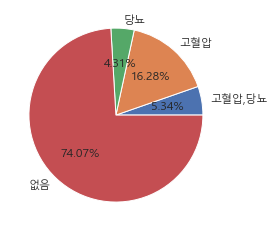

In [152]:
plt.pie(x = count_by_cut, labels = ['고혈압,당뇨', '고혈압', '당뇨', '없음'], autopct = '%.2f%%') 
plt.show()

`-` 고혈압/당뇨 둘 다 진료내역 없음이 74%로 가장 많이 차지한다

`-` 당뇨 진료내역만 있는 경우는 4%, 고혈압 진료내역만 있는 경우는 16%, 둘다 있는 경우는 5%이다

`-` 둘 다 진료내역이 있는 경우가 당뇨 진료내역만 있는 경우보다 많은 것으로 보아 당뇨가 있는 경우 고혈압도 있는 경우가 빈번한 것 같다

`-` 고혈압/당뇨 진료내역에 따른 사람들의 연령대와 성별을 확인해보자

`-` 우선 고혈압/당뇨 진료내역에 따른 연령대를 확인하자

### 고혈압, 당뇨 진료내역과 연령대 분할표

In [153]:
# 만약 연령대 순서가 맞지 않는다면 아래를 실행하면 된다
# df['연령대'] = pd.Categorical(df['연령대'], ['20대초반', '20대후반', '30대초반', '30대후반', '40대초반', '40대후반', '50대초반', '50대후반', '60대초반', '60대후반', '70대초반', '75세이상'])

In [156]:
DIS_AGE_table = df.groupby(['연령대', '고혈압_당뇨']).size().reset_index(name = 'cnt').pivot(index = '고혈압_당뇨', columns = '연령대', values = 'cnt')
# DIS_AGE_table = pd.crosstab(df['고혈압_당뇨'], df['연령대'], margins = True)

In [157]:
DIS_AGE_table

연령대,20대초반,20대후반,30대초반,30대후반,40대초반,40대후반,50대초반,50대후반,60대초반,60대후반,70대초반,75세이상
고혈압_당뇨,,,,,,,,,,,,
1,9,35,137,431,1358,2763,5362,7861,8818,9232,9300,8092
2,80,359,1104,2936,7607,13091,21954,26180,24447,23256,21241,20571
3,79,253,543,1233,2865,4400,6555,7371,6648,5524,4479,3164
4,26531,63969,82299,82039,116750,98724,95105,69940,43387,28475,19365,14078


`-` 공통적으로 확인되는것은 4번의 경우가 가장 많은 것과 2번의 경우가 3번의 경우보다 더 많다는 것이다

`-` 당뇨병보다는 고혈압이 흔한것 같다

`-` 그리고 젊은 연령대에서는 1의 경우가 2, 3인 경우보다 더 적은데 50대 초반부터는 늙을수록 1의 경우가 3의 경우보다 더 많아진다

`-` 50대 부터는 당뇨가 있는 경우 고혈압도 있는 경우가 흔한것같고 이는 연령대가 높아질수록 더 심해진다 

`-` 그런데 연령마다 총인원수가 다르기에 사람수로 판단하기 보다는 비율로 판단하는게 좋아보인다

`-` 예로 70대초반에서 고혈압_당뇨 범주값이 1인 경우 count는 9300이고 75세이상의 경우는 8092여서 감소한것 같지만 70대초반 인구수와 75세이상 인구수가 다르기에 비율로 따져야 정확하다

In [160]:
DIS_AGE_table_prob = DIS_AGE_table.apply(lambda x: x*100 / sum(x), axis = 0) # 상대도수를 구함
DIS_AGE_table_prob

연령대,20대초반,20대후반,30대초반,30대후반,40대초반,40대후반,50대초반,50대후반,60대초반,60대후반,70대초반,75세이상
고혈압_당뇨,,,,,,,,,,,,
1,0.033709,0.054166,0.162934,0.497466,1.056152,2.322278,4.157363,7.059595,10.585834,13.885421,17.100303,17.627709
2,0.299637,0.555590,1.312988,3.388774,5.916161,11.002874,17.021771,23.511028,29.348139,34.978266,39.056725,44.812112
3,0.295891,0.391544,0.645790,1.423147,2.228185,3.698163,5.082341,6.619549,7.980792,8.308391,8.235727,6.892495
4,99.370763,98.998700,97.878287,94.690613,90.799502,82.976685,73.738525,62.809828,52.085234,42.827921,35.607245,30.667683


`-` 일단 4(고혈압,당뇨 둘 다 없음)인 경우를 확인해보자

`-` 20대초반의 99%는 4인데 나이가 들어감에 따라 비율이 감소하여 75세이상에서는 4의 경우가 30%이다

`-` 1과 2의 경우는 4의 경우와 반대로 나이가 들어가면서 비율이 높아진다

`-` 3의 경우는 60대후반까지는 증가하다가 그 이후부터 줄어든다

`-` 요약하면 나이를 먹을수록 4는 증가하고 1,2,3은 감소한다(건강한 사람보다는 병을 앓던 사람이 많다는 의미이다)

`-` 고혈압_당뇨 범주마다 연령대의 비율은 어느정도인지 시각화해보자

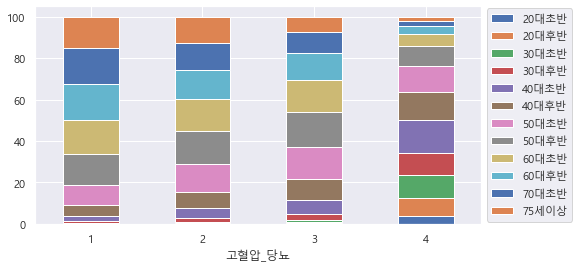

In [162]:
DIS_AGE_table_prob2 = DIS_AGE_table.apply(lambda x: x*100 / sum(x), axis = 1) # 상대도수를 구함
DIS_AGE_table_prob2.plot.bar(stacked = True, rot = 0)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

`-` 막대그래프의 밑에서부터 20대초반, 20대후반, $\cdots$, 70대 초반, 75세이상이다

`-` 고혈압_당뇨가 1, 2, 3인 경우는 비슷해보인다

`-` 고혈압/당뇨 둘 다 진료내역이 없는 경우(4)에는 확실히 다르다

`-` 고혈압/당뇨가 1, 2, 3인 경우 30대 후반까지 차지하는 비중이 낮다

`-` 하지만 4인 경우에는 30대 후반까지 차지하는 비중이 높아졌다

### 고혈압, 당뇨 진료내역과 성별 분할표

`-` 이제 고혈압/당뇨 진료내역에 따른 성별을 확인하자

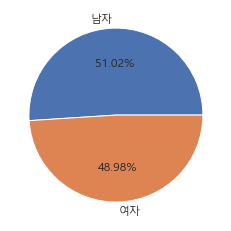

In [168]:
count = df.groupby('성별').size()
plt.pie(x = count, labels = ['남자', '여자'], autopct = '%.2f%%') 
plt.show()

`-` 우선 전체 백만명중 남자가 51% 여자가 49%로 둘이 비슷하다

In [169]:
DIS_SEX_table = df.groupby(['성별', '고혈압_당뇨']).size().reset_index(name = 'cnt').pivot(index = '고혈압_당뇨', columns = '성별', values = 'cnt')

In [170]:
DIS_SEX_table

성별,1,2
고혈압_당뇨,,
1,27979,25419
2,79892,82934
3,23900,19214
4,378456,362206


In [171]:
DIS_SEX_table_prob = DIS_SEX_table.apply(lambda x: x*100 / sum(x), axis = 1) # 상대도수를 구함
DIS_SEX_table_prob

성별,1,2
고혈압_당뇨,,
1,52.397094,47.602906
2,49.065874,50.934126
3,55.434430,44.565570
4,51.096992,48.903008


<AxesSubplot:xlabel='고혈압_당뇨'>

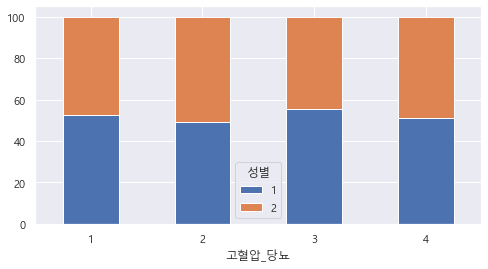

In [172]:
DIS_SEX_table_prob.plot.bar(stacked = True, rot = 0)

`-` 당뇨진료내역이 있는 경우 남자의 비율이 여자보다 살짝 높고 나머지는 비슷하다

`-` 성별과 고혈압/당뇨 진료내역은 연관이 없어보인다

## 양적변수 탐색

### 개별 변수의 시각화

#### 수축기혈압

`-` 양적 변수인 수축기혈압, 이완기혈압, 공복혈당, BMI의 분포를 확인해보자

<AxesSubplot:xlabel='수축기혈압', ylabel='Count'>

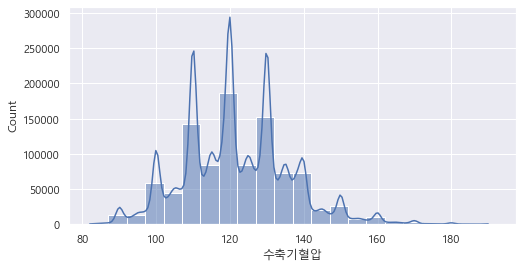

In [174]:
sns.histplot(data = df, x = '수축기혈압', binwidth = 5, kde = True) ## 구간을 5씩 끊어서 관찰

`-` 분포의 모양을 크게 눈에 띄는 봉우리가 4개(100, 110, 120, 130) 존재한다

`-` 즉 몇 군데(봉우리)에 데이터가 많이 몰려있다는 의미이다

<AxesSubplot:xlabel='수축기혈압'>

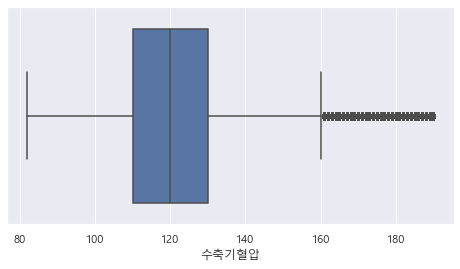

In [175]:
sns.boxplot(x = df['수축기혈압'])

`-` boxplot을 보니 수축기혈압의 이상점은 160을 넘는 경우인 듯 하다

`-` 분포의 모양을 자세히 확인해보자

<AxesSubplot:xlabel='수축기혈압'>

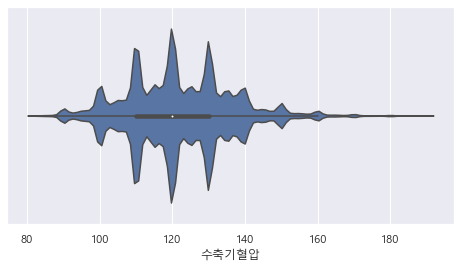

In [176]:
sns.violinplot(x = df['수축기혈압'])

`-` 성별에 따라 수축기혈압이 다른지 궁금하다

<AxesSubplot:xlabel='성별', ylabel='수축기혈압'>

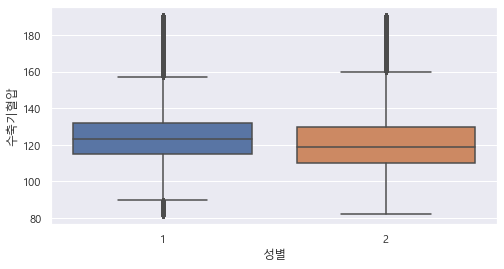

In [19]:
sns.boxplot(x = '성별', y = '수축기혈압', data = df)

In [21]:
df.groupby('성별')['수축기혈압'].describe()

,count,mean,std,min,25%,50%,75%,max
성별,,,,,,,,
1,510227.0,124.279954,13.547532,82.0,115.0,123.0,132.0,190.0
2,489773.0,119.363001,15.146169,82.0,110.0,119.0,130.0,190.0


`-` 남자인 경우 여자인 경우보다 평균적으로 수축기혈압이 5정도 높다 

`-` 근데 사실 궁금한건 고혈압/당뇨인 사람들은 어떤 특성을 가진 사람들인가이다

`-` 고혈압/당뇨에 따라 plot을 그려보자

<AxesSubplot:xlabel='수축기혈압', ylabel='Count'>

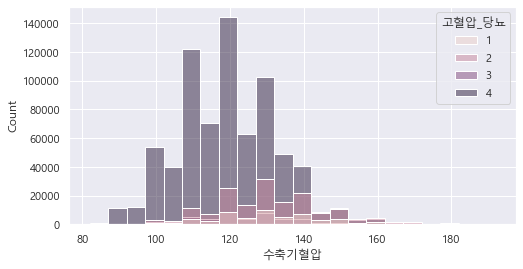

In [177]:
sns.histplot(x = '수축기혈압', binwidth = 5, hue = '고혈압_당뇨', data = df)

`-` 고혈압, 당뇨 둘다 없는 사람은 수축기혈압이 90\~140에 있는것으로 보이고 그 외에는 100\~160에 있는것으로 보인다

`-` 하지만 고혈압/당뇨 둘 다 진료내역이 없는 경우의 표본수가 많아 나머지는 잘 보이지 않는다

`-` 고혈압/당뇨 진료내역에 따라 각각 히스토그램을 그려보자

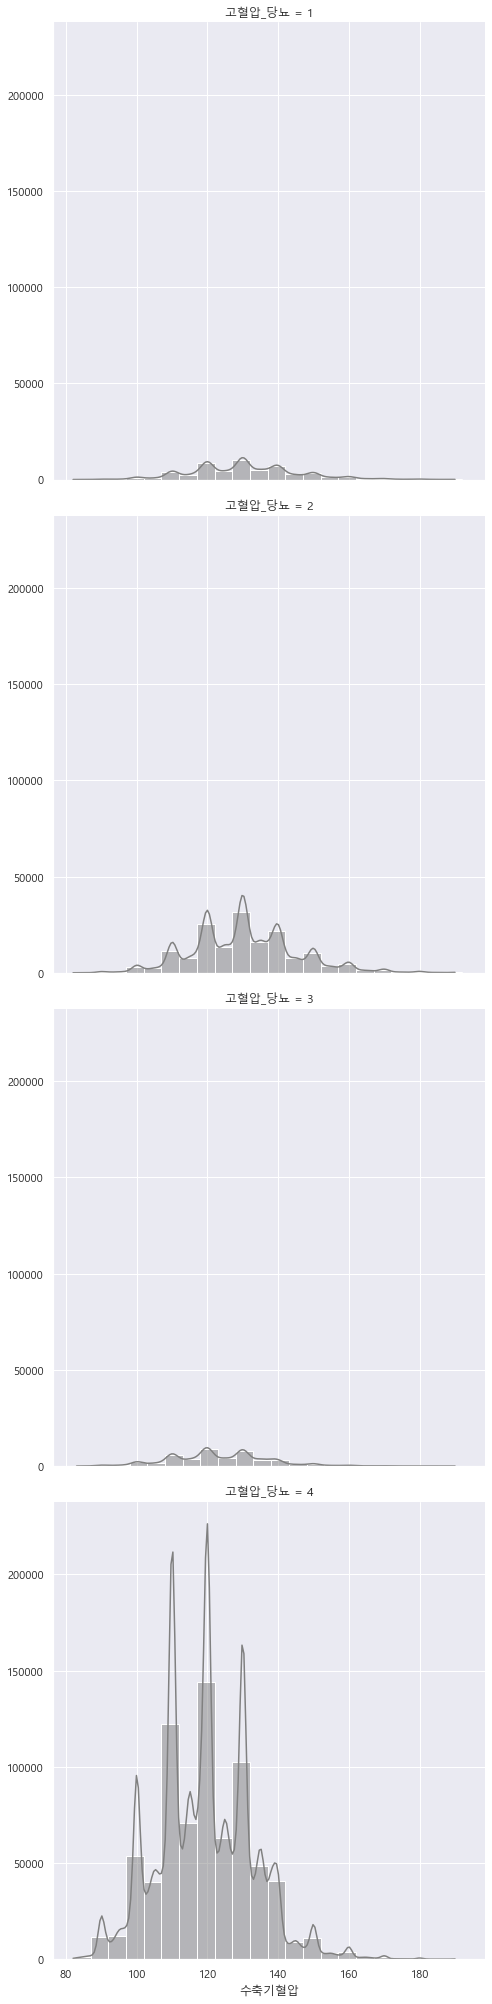

In [178]:
b = sns.FacetGrid(data = df, row = '고혈압_당뇨', height = 7)
b.map(sns.histplot, '수축기혈압', kde = True, binwidth = 5, color = 'gray')

`-` 분포는 모두 대칭이고 종모양으로 보이며 봉우리가 많다

`-` 고혈압_당뇨가 1,2인 경우는 130이 중심으로 보인다

`-` 고혈압_당뇨가 3,4인 경우는 120이 중심으로 보인다

`-` 이를 박스플랏을 통해 자세히 확인하자

<AxesSubplot:xlabel='고혈압_당뇨', ylabel='수축기혈압'>

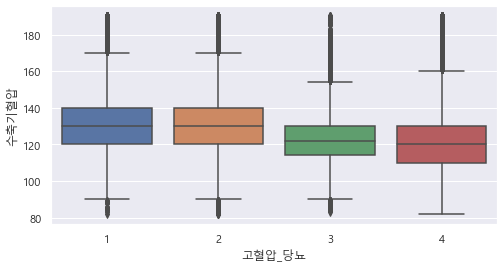

In [179]:
sns.boxplot(x = '고혈압_당뇨', y = '수축기혈압', data = df)

`-` 고혈압/당뇨 둘다 진료내역이 없는 그룹은 수축기혈압이 낮은쪽에서는 이상점이 없다

`-` 바이올린플랏을 그려 분포의 모양도 같이 확인하자

<AxesSubplot:xlabel='고혈압_당뇨', ylabel='수축기혈압'>

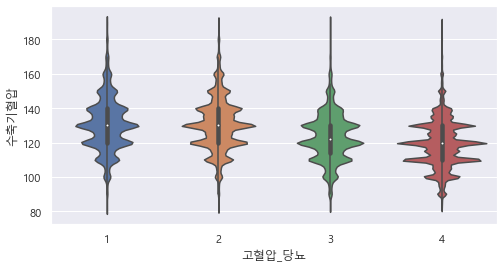

In [180]:
sns.violinplot(x = '고혈압_당뇨', y = '수축기혈압', data = df)

`-` 봉우리가 많은 이유가 고혈압_당뇨 진료내역에 따라 분포가 상이하여 그럴것 같았지만 아니었다

`-` 고혈압/당뇨 진료내역이 없는 사람들의 수축기 혈압은 다른 경우 비해 몇군데에 더욱 많이 몰렸있다

`-` 봉우리가 많은 분포임은 넷다 동일하다

`-` 데이터를 보면 1은 고혈압 당뇨 둘 다 진료내역이 있고 2는 고혈압만 3은 당뇨만 있고 4는 둘 다 진료 내역이 없는 경우이다

`-` 2와 3을 보면 2가 수축기 혈압이 평균적으로 더 높다

`-` 그런데 1과 2를 보면 거의 차이가 없어보인다

`-` 3과 4를 보면 당뇨 진료내역이 있는 사람들이 그렇지 않은 사람보다 평균이 조금 더 크고 분포도 더 넓게 퍼져있다

`-` 고협압/당뇨 둘 다 진료내역이 없는 상황에서 당뇨 진료내역이 추가되면 수축기 혈압이 높아지고 더 넓게 분포한다

`-` 하지만 고혈압 진료내역이 있는 상태라면 당뇨 진료내역의 유무는 수축기 혈압에 거의 영향을 끼치지 못하는 것으로 보인다

`-` 수치로 정확히 확인해보자

In [189]:
df.groupby('고혈압_당뇨')['수축기혈압'].describe()

,count,mean,std,min,25%,50%,75%,max
고혈압_당뇨,,,,,,,,
1,53398.0,130.563972,14.981472,82.0,120.0,130.0,140.0,190.0
2,162826.0,130.551300,14.851658,82.0,120.0,130.0,140.0,190.0
3,43114.0,123.322146,13.618274,83.0,114.0,122.0,130.0,190.0
4,740662.0,119.252575,13.484496,82.0,110.0,120.0,130.0,190.0


`-` 고혈압 진료내역만 있는 경우와 둘 다 진료내역이 있는 경우에 둘의 수축기 혈압 분포는 거의 똑같다

`-` 표준편차는 약 15이고 평균은 약 130이다

`-` 둘 다 진료내역이 없는 경우가 당뇨 진료내역만 있는 경우보다 수축기 혈압이 평균 4정도 낮다

`-` 표준편차는 두 분포 모두 약 13.5이다

`-` 고혈압이 있는 경우 그렇지 않은 경우보다 수축기 혈압이 평균 10정도 높다

`-` 위에서 말했듯이 고혈압 진료내역이 있는 상태라면 당뇨병 진료내역과 수축기혈압은 상관이 없다

`-` 하지만 고혈압이 없고 당뇨만 있는 상태라면 없는 경우보다 수축기혈압이 높다 

`-` 이완기 혈압도 수축기 혈압과 비슷한 양상을 보이는지 확인하자

#### 이완기혈압

<AxesSubplot:xlabel='이완기혈압', ylabel='Count'>

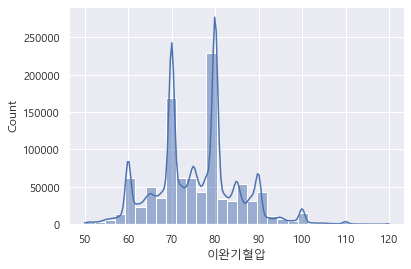

In [61]:
sns.histplot(data = df, x = '이완기혈압', bins = 30, kde = True)

`-` 이완기 혈압도 수축기 혈압의 분포처럼 몇 군에데 데이터가 많이 몰려있는 분포(봉우리)이다

<AxesSubplot:xlabel='성별', ylabel='이완기혈압'>

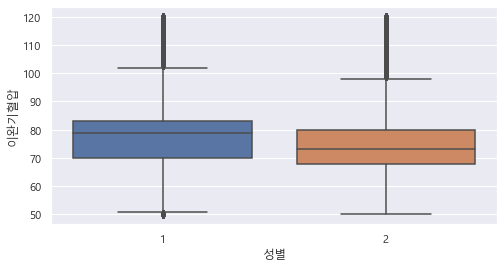

In [22]:
sns.boxplot(x = '성별', y = '이완기혈압', data = df)

In [23]:
df.groupby('성별')['이완기혈압'].describe()

,count,mean,std,min,25%,50%,75%,max
성별,,,,,,,,
1,510227.0,77.614977,9.504481,50.0,70.0,79.0,83.0,120.0
2,489773.0,73.884467,9.727230,50.0,68.0,73.0,80.0,120.0


`-` 남자인 경우 여자인 경우보다 평균적으로 이완기혈압이 4정도 높다 

`-` 수축기 혈압 분포와 이완기 혈압 분포를 같이 놓고 비교해보자

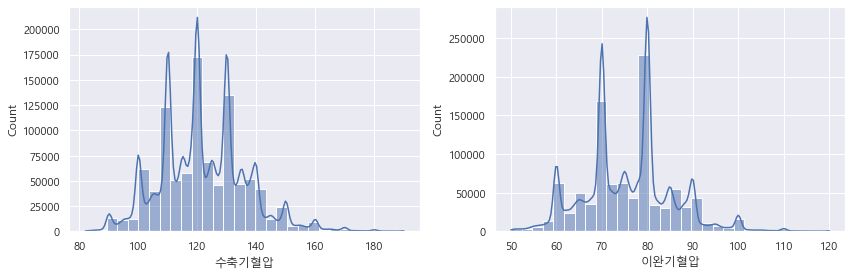

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(12)

sns.histplot(data = df, x = '수축기혈압', bins = 30, kde = True, ax = ax1)
sns.histplot(data = df, x = '이완기혈압', bins = 30, kde = True, ax = ax2)

fig.tight_layout()

`-` 수축기 혈압 분포의 봉우리가 이완기 혈압 분포의 봉우리 개수보다 많다

`-` 수축기 혈압이 이완기 혈압 분포보다 더 넓게 퍼져있다(표준 편차가 더 크다)

`-` 고혈압/당뇨에 따른 이완기 혈압 분포를 확인하자

<AxesSubplot:xlabel='이완기혈압', ylabel='Count'>

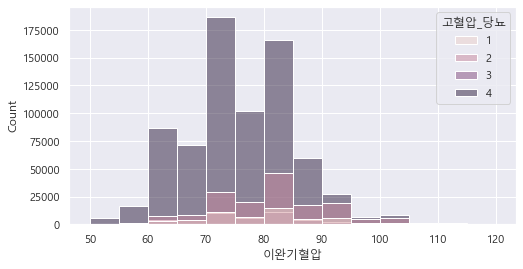

In [28]:
sns.histplot(x = '이완기혈압', binwidth = 5, hue = '고혈압_당뇨', data = df)

`-` 고혈압, 당뇨 둘 다 없는 경우 이완기혈압은 50\~105에 분포하는 것으로 보이고 나머지는 60\~105에 분포하는 것 같다

`-` 하지만 이 역시 고혈압/당뇨 둘 다 진료내역이 없는 경우의 표본수가 많아 나머지는 잘 보이지 않는다

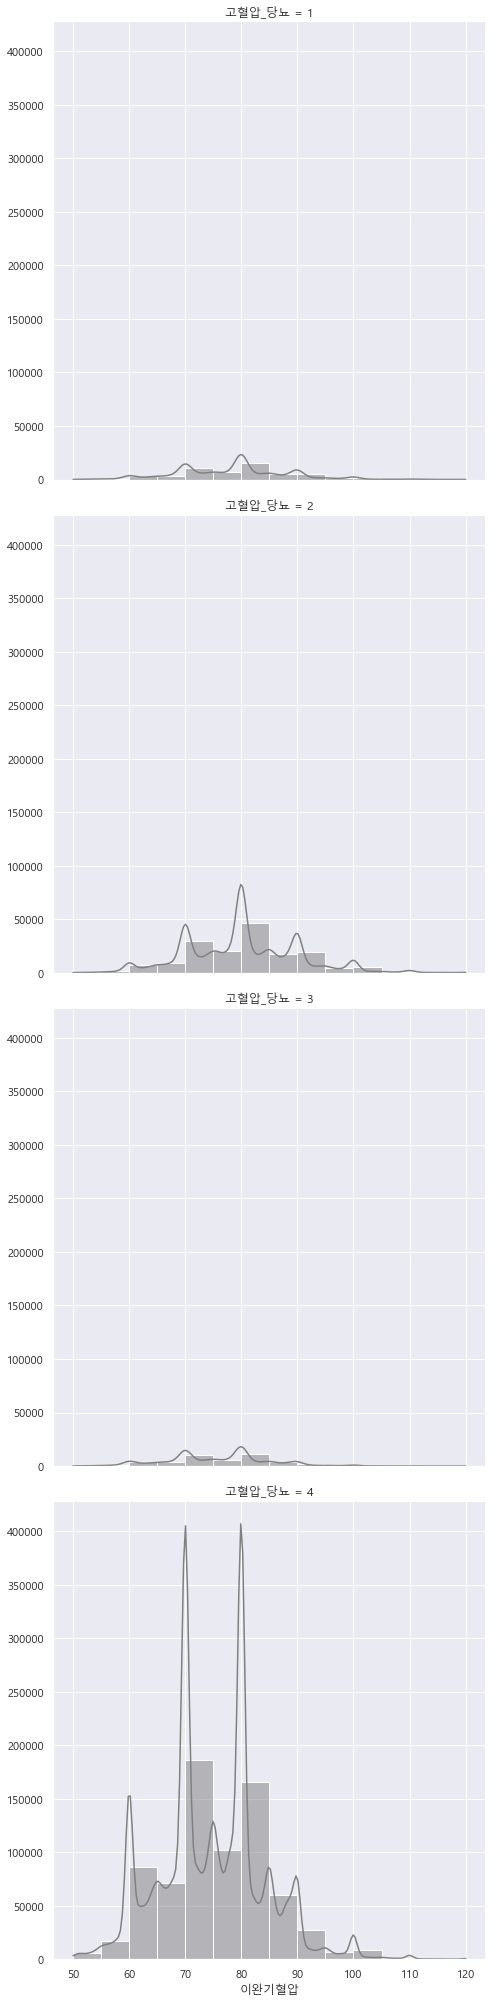

In [60]:
b = sns.FacetGrid(data = df, row = '고혈압_당뇨', height = 7)
b.map(sns.histplot, '이완기혈압', kde = True, binwidth = 5, color = 'gray')

`-` 4개의 분포모두 80이 중심으로 보인다

`-` 이를 박스플랏을 통해 자세히 살펴보자

<AxesSubplot:xlabel='고혈압_당뇨', ylabel='이완기혈압'>

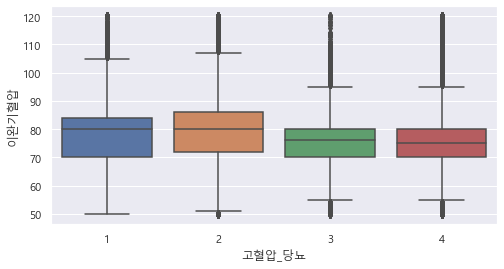

In [58]:
sns.boxplot(x = '고혈압_당뇨', y = '이완기혈압', data = df)

`-` 고혈압/당뇨 둘 다 진료내역이 있는 그룹은 이완기혈압이 낮은쪽에서는 이상점이 없다

`-` 당뇨만 있거나 둘 다 없는 경우에 두 이완기혈압의 분포는 거의 비슷하다

`-` 고혈압만 있거나 둘 다 있는 경우에 두 이완기혈압의 분포는 거의 비슷한데 고혈압만 있는경우가 이완기혈압이 조금 더 높아보인다

<AxesSubplot:xlabel='고혈압_당뇨', ylabel='이완기혈압'>

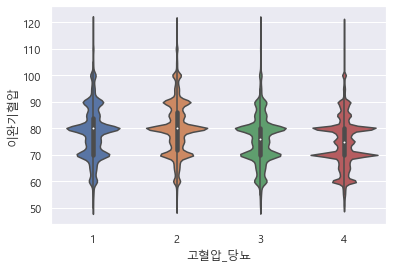

In [65]:
sns.violinplot(x = '고혈압_당뇨', y = '이완기혈압', data = df)

`-` 이완기 혈압도 수축기혈압과 동일한 양상을 보인다

`-` 수치를 통해 정확히 확인해보면 다음과 같다

In [190]:
df.groupby('고혈압_당뇨')['이완기혈압'].describe()

,count,mean,std,min,25%,50%,75%,max
고혈압_당뇨,,,,,,,,
1,53398.0,78.366193,9.874400,50.0,70.0,80.0,84.0,120.0
2,162826.0,80.040417,10.050473,50.0,72.0,80.0,86.0,120.0
3,43114.0,75.679478,9.137214,50.0,70.0,76.0,80.0,120.0
4,740662.0,74.673427,9.471040,50.0,70.0,75.0,80.0,120.0


`-` 둘 다 없는 경우보다 당뇨만 있는 경우 이완기혈압의 평균이 1정도 높다

`-` 고혈압이 있으면 위의 경우보다 혈압이 평균적으로 4~5정도 높다

`-` 신기한건 고혈압만 있는 경우가 고혈압, 당뇨 둘 다 있는 경우보다 사분위수와 평균이 약 2정도 더 크다

`-` 결과적으로 보면 당뇨 진료내역 여부는 혈압에 영향을 별로 끼치지 못한다

`-` 고혈압 진료내역이 있는 경우 수축기혈압과 이완기 혈압이 높은데 이는 당연하다(고혈압은 혈압이 높은것)

`-` 그리고 고혈압이 있는 경우가 그렇지 않은 경우보다 혈압이 높은데 수축기혈압의 증가폭(10)이 이완기혈압의 증가폭(5)보다 더 크다

#### 수축기혈압과 이완기혈압 고찰

`-` 위에서 수축기혈압과 이완기혈압의 분포를 살펴봤는데 고혈압 진료내역이 있지만 혈압이 낮은 사람도 있고 고혈압 진료내역이 없지만 혈압이 높은사람도 있었다

`-` 고혈압 진료내역이 있지만 혈압이 정상범주안에 있는 사람은 혈압관리가 잘되고 있는것으로 간주할 수 있을 것 같다

`-` 이들의 비율을 확인해보자

`-` 고혈압은 우리나라 기준 수축기 혈압 140mmHg 이상이거나 이완기 혈압 90mmHg 이상인 경우라고 한다

`-` 참고 : http://hqcenter.snu.ac.kr/archives/jiphyunjeon/%EA%B3%A0%ED%98%88%EC%95%95

`-` 위에 고혈압 기준을 넘어가는 혈압을 가진 사람들은 고혈압으로 그렇지 않는 사람은 정상혈압으로 간주하자

`-` 그런데 수축기혈압, 이완기혈압의 분포를 보면 혈압이 매우 낮은 사람도 존재함을 알 수 있다

`-` 이들은 저혈압으로 간주할 수 있을 것 같다

`-` 저혈압은 일반적으로 수축기 혈압 90mmHg 미만이거나 이완기 혈압 60mmHg 미만인 경우라고한다

`-` 참고 : https://health.kdca.go.kr/healthinfo/biz/health/gnrlzHealthInfo/gnrlzHealthInfo/gnrlzHealthInfoView.do?cntnts_sn=4616

In [6]:
def f(x, y):
    if x >= 140 or y >= 90:
        z = '고혈압'
    elif x < 90 or y < 60:
        z = '저혈압'
    else:
        z = '정상혈압'
    return z

In [7]:
df['혈압범주'] = list(map(f, df['수축기혈압'], df['이완기혈압']))

In [8]:
df.head()

,성별,연령대,수축기혈압,이완기혈압,공복혈당,고혈압_당뇨,BMI,혈압범주
0,1,20대초반,116,78,94,4,16.6,정상혈압
1,1,20대초반,100,60,79,4,22.3,정상혈압
2,1,20대초반,100,60,87,4,21.9,정상혈압
3,1,20대초반,111,70,72,4,20.2,정상혈압
4,1,20대초반,120,80,98,4,20.0,정상혈압


In [230]:
count = df.groupby('혈압범주').size()

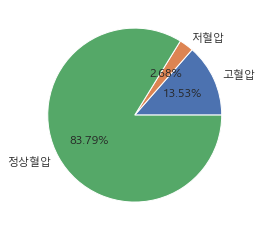

In [231]:
plt.pie(x = count, labels = ['고혈압', '저혈압', '정상혈압'], autopct = '%.2f%%') 
plt.show()

`-` 정상혈압은 약 84%, 고혈압은 약 14%, 저혈압은 약 3% 이다

`-` 저혈압보다는 고혈압이 흔한것같다

`-` 고혈압 진료내역이 있는 사람이 약 22%정도였는데 7%p정도 차이가 있다

In [220]:
tab = pd.crosstab(df['혈압범주'], df['고혈압_당뇨'])
tab

고혈압_당뇨,1,2,3,4
혈압,,,,
고혈압,16318,51261,5696,62049
저혈압,773,1518,1056,23435
정상혈압,36307,110047,36362,655178


In [222]:
tab.apply(lambda x: x*100 / sum(x), axis = 0) 

고혈압_당뇨,1,2,3,4
혈압,,,,
고혈압,30.559197,31.482073,13.211486,8.377506
저혈압,1.447620,0.932284,2.449320,3.164061
정상혈압,67.993183,67.585644,84.339194,88.458433


`-` 위를 보면 고혈압_당뇨 둘 다 없더라도 12%정도는 혈압에 문제가 있는것을 알 수 있다

`-` 신기한건 고혈압 진료내역이 있는 경우인데 고혈압 진료내역이 있지만 실제 고혈압인 경우는 약 31%이고 68%는 정상혈압 나머지 1%는 저혈압이다

#### 맥압

`-` 수축기혈압과 이완기혈압의 차이를 맥압이라고 하는데 수축기혈압과 이완기혈압 둘다 정상 범주에 속하더라도 맥압이 높다면 건강상에 문제가 있을 수 있다고 한다

`-` 참고 : http://assinmun.kr/m/page/view.php?no=4162&code=20140925141337_5787&d_code=20140925150830_7887&ds_code=

`-` 맥압의 분포는 어떻게 되는지 살펴보도록 하겠다

In [15]:
df['맥압'] = df['수축기혈압'] - df['이완기혈압']

In [16]:
df.head()

,성별,연령대,수축기혈압,이완기혈압,공복혈당,고혈압_당뇨,BMI,혈압범주,혈당범주,맥압
0,1,20대초반,116,78,94,4,16.6,정상혈압,정상혈당,38
1,1,20대초반,100,60,79,4,22.3,정상혈압,정상혈당,40
2,1,20대초반,100,60,87,4,21.9,정상혈압,정상혈당,40
3,1,20대초반,111,70,72,4,20.2,정상혈압,정상혈당,41
4,1,20대초반,120,80,98,4,20.0,정상혈압,정상혈당,40


<AxesSubplot:xlabel='맥압', ylabel='Count'>

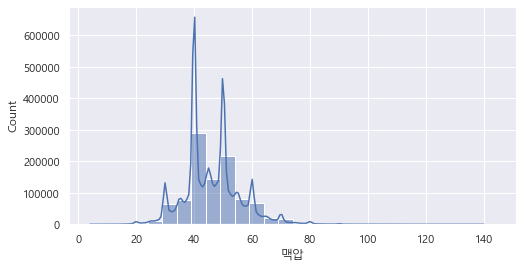

In [13]:
sns.histplot(data = df, x = '맥압', binwidth = 5, kde = True)

`-` 눈에 띄는 봉우리가 2개 보인다(쌍봉 분포)

`-` 일단 왜 봉우리가 2개인지에 대해서는 넘어가고 고혈압, 당뇨 진료내역에 따른 박스플랏을 그려보자

<AxesSubplot:xlabel='고혈압_당뇨', ylabel='맥압'>

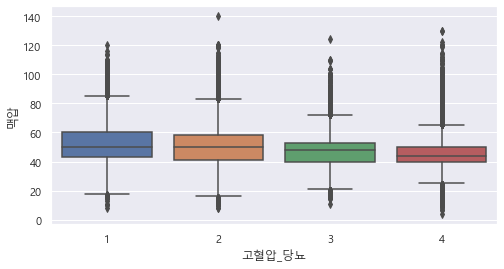

In [14]:
sns.boxplot(x = '고혈압_당뇨', y = '맥압', data = df)

`-` 고혈압, 당뇨 진료내역에 따른 수축기혈압, 이완기혈압 분포를 확인했을땐 당뇨병만 진료내역이 있는 경우와 둘 다 없는 경우의 분포가 비슷했는데 맥압의 경우는 다르다

<AxesSubplot:xlabel='고혈압_당뇨', ylabel='맥압'>

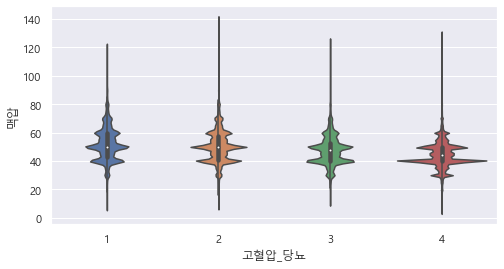

In [26]:
sns.violinplot(x = '고혈압_당뇨', y = '맥압', data = df)

`-` 고혈압 진료내역이 있지만 현재는 혈압이 정상범주에 속해있을 수 도 있다

`-` 그러니 고혈압, 당뇨 진료내역의 따른 맥압의 분포말고 건강검진을 받았을 당시의 혈압으로 구분하자

`-` 혈압이 정상범주인 경우의 맥압의 분포와 그렇지 않은 경우 맥압의 분포를 비교해보자

<AxesSubplot:xlabel='혈압범주', ylabel='맥압'>

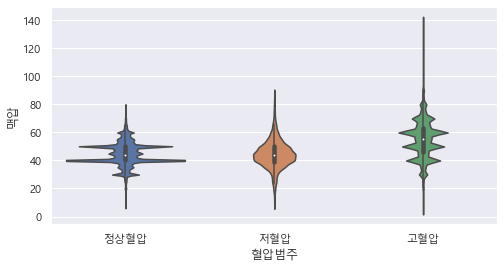

In [28]:
sns.violinplot(x = '혈압범주', y = '맥압', data = df)

`-` 저혈압의 경우 종모양을 띄고있다

`-` 고혈압의 경우 눈에띄는 봉우리가 4개정도 보인다

`-` 바이올린플랏을 보면 정상혈압에서 유달리 눈에띄는 2개의 봉우리를 볼 수 있는데 이 때문에 맥압이 쌍봉분포의 형태를 띄는것으로 보인다 

`-` 위 출처에 나와있는 설명을 보면 나이가 들어감에따라 맥압이 높아진다고 한다

`-` 연령대에 따른 박스플랏을 그려보자

<AxesSubplot:xlabel='연령대', ylabel='맥압'>

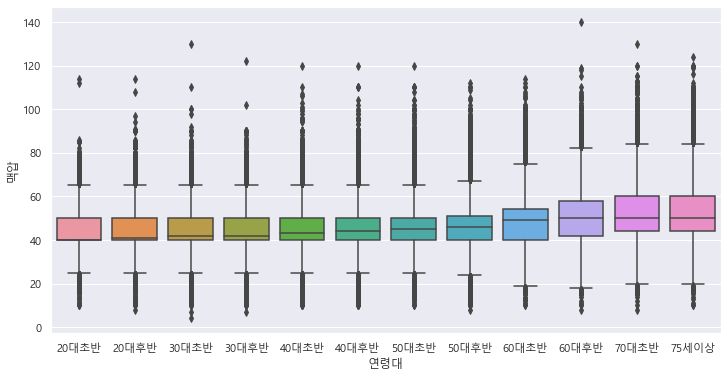

In [25]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = '연령대', y = '맥압', data = df)

`-` 연령대가 높아질수록 평균 맥압은 증가하는것으로 보인다

<AxesSubplot:xlabel='연령대', ylabel='맥압'>

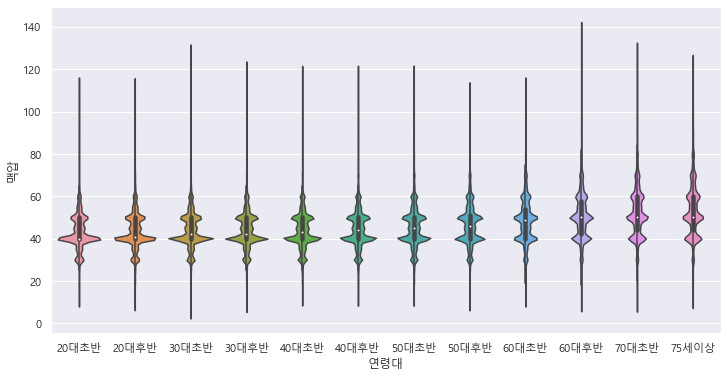

In [29]:
plt.figure(figsize = (12, 6))
sns.violinplot(x = '연령대', y = '맥압', data = df)

`-` 해볼것 : 연령대를 50대초반 or 60대초반을 기준으로 나누고 맥압분포 확인하기

<AxesSubplot:xlabel='성별', ylabel='맥압'>

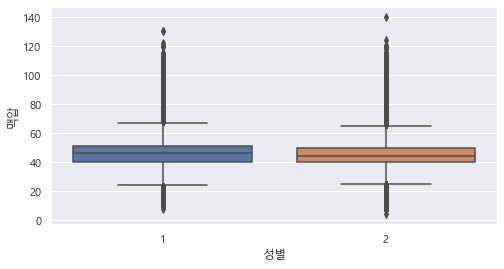

In [18]:
sns.boxplot(x = '성별', y = '맥압', data = df)

<AxesSubplot:xlabel='성별', ylabel='맥압'>

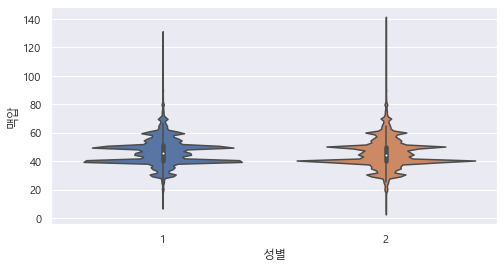

In [17]:
sns.violinplot(x = '성별', y = '맥압', data = df)

In [24]:
df.groupby('성별')['맥압'].describe()

,count,mean,std,min,25%,50%,75%,max
성별,,,,,,,,
1,510227.0,46.664977,9.35818,8.0,40.0,46.0,51.0,130.0
2,489773.0,45.478534,10.20447,4.0,40.0,44.0,50.0,140.0


`-` 남자인 경우 여자인 경우보다 평균적으로 수축기혈압이 5정도 높았고 이완기혈압은 4정도 높았는데 맥압의 경우는 1정도밖에 차이가 나지 않는다

`-` 위의 plot을 보면 성별과 맥압도 관련 없어보인다(맥압말고 다른 양적변수에 대해서도 탐색할 필요가 있을듯하다) 

`-` 우선 혈압은 여기까지 살펴보고 공복혈당의 분포를 확인하자

#### 공복혈당

<AxesSubplot:xlabel='공복혈당', ylabel='Count'>

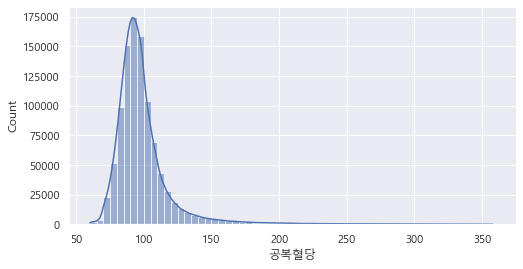

In [9]:
sns.histplot(data = df, x = '공복혈당', binwidth = 5, kde = True)

`-` 정규분포일 것 같았지만 오른쪽으로 꼬리가 긴 분포이다

`-` 성별에 따라 공복혈당이 다른지 확인해보자

<AxesSubplot:xlabel='성별', ylabel='공복혈당'>

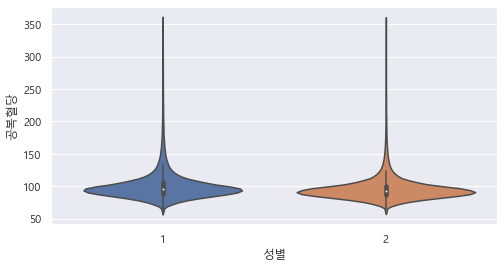

In [25]:
sns.violinplot(x = '성별', y = '공복혈당', data = df)

`-` 성별에 따라 공복혈당은 다르지 않아 보인다

`-` 여태까지의 시각화를 보면 성별은 중요하지 않은 변수처럼 보인다(매번 성별에 따른 시각화를 하기 힘드니 편의상 분석에서 제외하자)

`-` 고혈압_당뇨 진료내역에 따른 공복혈당의 분포를 확인하자

<AxesSubplot:xlabel='고혈압_당뇨', ylabel='공복혈당'>

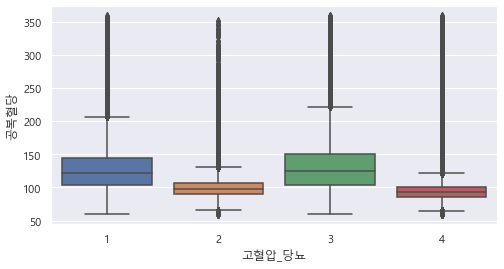

In [61]:
sns.boxplot(x = '고혈압_당뇨', y = '공복혈당', data = df)

<AxesSubplot:xlabel='고혈압_당뇨', ylabel='공복혈당'>

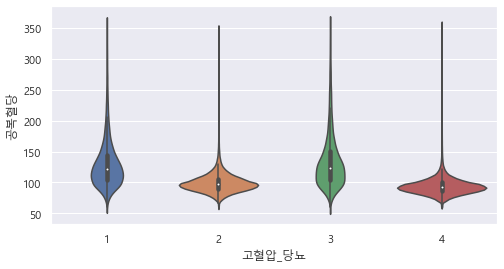

In [62]:
sns.violinplot(x = '고혈압_당뇨', y = '공복혈당', data = df)

In [226]:
df.groupby('고혈압_당뇨')['공복혈당'].describe()

,count,mean,std,min,25%,50%,75%,max
고혈압_당뇨,,,,,,,,
1,53398.0,130.447114,40.524698,60.0,104.0,122.0,145.0,358.0
2,162826.0,99.671023,16.816511,60.0,90.0,97.0,106.0,351.0
3,43114.0,134.759892,45.923753,60.0,104.0,124.0,151.0,358.0
4,740662.0,94.320677,15.557456,60.0,86.0,93.0,100.0,358.0


`-` 4개의 분포 모두 공복혈당이 큰 쪽에 이상점이 매우 많다

`-` 고혈압, 당뇨 둘 다 진료내역이 있는 경우와 당뇨 진료내역이 있는 경우의 분포는 당뇨만 있는 경우가 조금 더 넓게 퍼진것을 빼면 동일하다

`-` 분포의 중심은 125인것으로 보인다

`-` 고혈압, 당뇨 둘 다 진료내역이 없는 경우와 고혈압만 있는 경우의 분포는 고혈압만 있는 경우가 조금 더 넓게 퍼진것을 빼면 동일하다

`-` 분포의 중심은 95인것으로 보인다

`-` 당뇨가 있다면 공복혈당이 평균적으로 30정도 높다

`-` 위의 그림을 통해 공복혈당의 분포는 당뇨병의 진료내역이 좌지우지하는것으로 보인다(고혈압은 거의 영향을 끼치지 못함)

<AxesSubplot:xlabel='혈압범주', ylabel='공복혈당'>

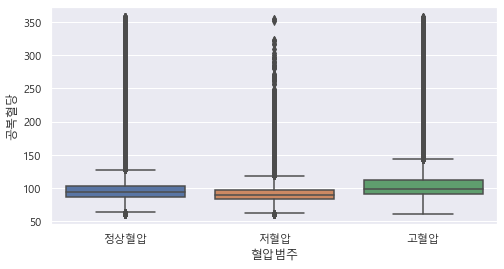

In [12]:
sns.boxplot(x = '혈압범주', y = '공복혈당', data = df)

<AxesSubplot:xlabel='혈압범주', ylabel='공복혈당'>

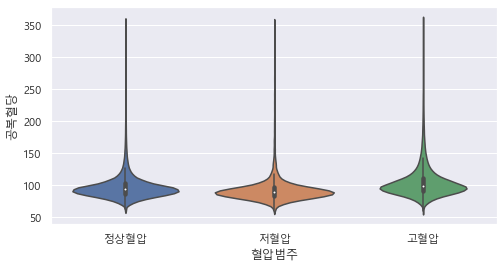

In [13]:
sns.violinplot(x = '혈압범주', y = '공복혈당', data = df)

`-` 고혈압인 경우 공복혈당이 고혈압이 아닌경우보다 더 높은것으로 보인다

#### 공복혈당 고찰

`-` 위에서 공복혈당 분포를 살펴봤는데 당뇨 진료내역이 있지만 공복혈당이 낮은 사람도 있고 당뇨 진료내역이 없지만 공복혈당이 높은사람도 있었다

`-` 당뇨 진료내역이 있지만 공복혈당이 정상범주안에 있는 사람은 혈당조절을 잘하고 있는것으로 간주할 수 있을 것 같다

`-` 이들의 비율을 확인해보자

`-` 당뇨병의 진단에 있어 혈당치의 기준은 공복 혈당치 126 mg/dL 이상(고혈당)이라고 한다

`-` 참고 : https://www.diabetes.or.kr/general/class/index.php?idx=5

`-` 위에서 기준을 넘어가는 혈당을 가진 사람들은 고혈당으로 그렇지 않는 사람은 정상혈당으로 간주하자

`-` 공복혈당이 너무 낮으면(60 mg/dL이하) 저혈당으로 간주하나 거의 최소값이 60 mg/dL임으로 무시하자 

In [10]:
def g(x):
    if x >= 126:
        y = '고혈당'
    else:
        y = '정상혈당'
    return y    

In [11]:
df['혈당범주'] = list(map(g, df['공복혈당']))

In [239]:
df.head()

,성별,연령대,수축기혈압,이완기혈압,공복혈당,고혈압_당뇨,BMI,혈압범주,혈당범주
0,1,20대초반,116,78,94,4,16.6,정상혈압,정상혈당
1,1,20대초반,100,60,79,4,22.3,정상혈압,정상혈당
2,1,20대초반,100,60,87,4,21.9,정상혈압,정상혈당
3,1,20대초반,111,70,72,4,20.2,정상혈압,정상혈당
4,1,20대초반,120,80,98,4,20.0,정상혈압,정상혈당


In [244]:
count = df.groupby('혈당범주').size()

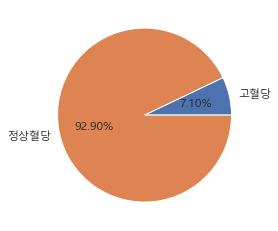

In [246]:
plt.pie(x = count, labels = ['고혈당', '정상혈당'], autopct = '%.2f%%') 
plt.show()

`-` 정상혈당은 약 93%, 고혈당은 약 7% 이다

`-` 저혈압보다는 고혈압이 흔한것같다

`-` 고혈압 진료내역이 있는 사람이 약 22%정도였는데 7%p정도 차이가 있다

In [220]:
tab = pd.crosstab(df['혈압범주'], df['고혈압_당뇨'])
tab

고혈압_당뇨,1,2,3,4
혈압,,,,
고혈압,16318,51261,5696,62049
저혈압,773,1518,1056,23435
정상혈압,36307,110047,36362,655178


In [222]:
tab.apply(lambda x: x*100 / sum(x), axis = 0) 

고혈압_당뇨,1,2,3,4
혈압,,,,
고혈압,30.559197,31.482073,13.211486,8.377506
저혈압,1.447620,0.932284,2.449320,3.164061
정상혈압,67.993183,67.585644,84.339194,88.458433


In [248]:
tab = pd.crosstab(df['혈당범주'], df['고혈압_당뇨'])
tab.apply(lambda x: x*100 / sum(x), axis = 0) 

고혈압_당뇨,1,2,3,4
혈당범주,,,,
고혈당,44.911794,5.178534,47.938025,2.412976
정상혈당,55.088206,94.821466,52.061975,97.587024


`-` 위를 보면 고혈압_당뇨 둘 다 없는경우 2.5%정도는 혈당에 문제가 있는것을 알 수 있다

`-` 앞서 봤던 고혈압(12%)에 비하면 매우 적은 수치이다

`-` 고혈압만 있는 경우 고혈당인 경우는 5%정도로 고혈압 당뇨 둘다 없는경우와 비슷한 수치이다

`-` 당뇨 진료내역이 있는 경우 고혈당인 경우는 47%정도이다

`-` 고혈압 진료내역이 있는 경우 고혈압인 경우는 31%정도였다

`-` 이와 비교하면 고혈압에서 정상혈압에 속하는 것보다 고혈당에서 정상혈당에 속하는것이 흔치않음을 알 수 있다

`-` 이제 BMI의 분포를 확인하자

#### BMI

<AxesSubplot:xlabel='BMI', ylabel='Count'>

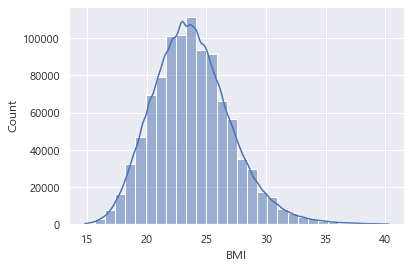

In [71]:
sns.histplot(data = df, x = 'BMI', bins = 30, kde = True)

`-` 정규분포인 것 같지만 오른쪽으로 꼬리가 조금 길다

`-` 고혈압_당뇨 진료내역에 따른 BMI의 분포를 확인하자

<AxesSubplot:xlabel='고혈압_당뇨', ylabel='BMI'>

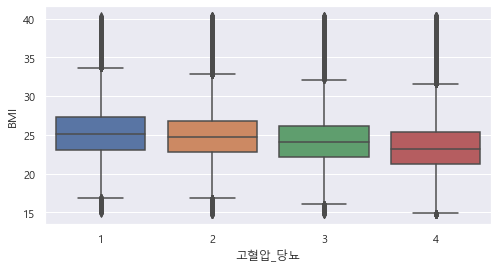

In [64]:
sns.boxplot(x = '고혈압_당뇨', y = 'BMI', data = df)

<AxesSubplot:xlabel='고혈압_당뇨', ylabel='BMI'>

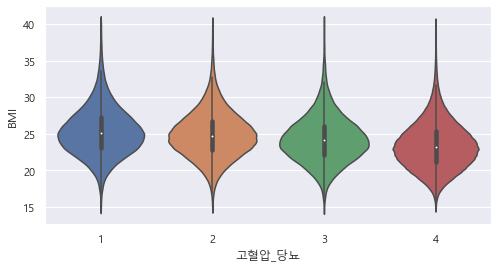

In [65]:
sns.violinplot(x = '고혈압_당뇨', y = 'BMI', data = df)

`-` $4\to 3\to 2\to 1$로 갈수록 BMI가 평균적으로 큰 것 같다 

`-` 수치로 정확히 확인하자

In [225]:
df.groupby('고혈압_당뇨')['BMI'].describe()

,count,mean,std,min,25%,50%,75%,max
고혈압_당뇨,,,,,,,,
1,53398.0,25.318072,3.315242,14.9,23.1,25.1,27.3,40.3
2,162826.0,24.915340,3.208607,14.8,22.8,24.7,26.8,40.3
3,43114.0,24.264160,3.182547,14.8,22.1,24.1,26.1,40.3
4,740662.0,23.423782,3.231101,14.8,21.2,23.2,25.4,40.3


`-` 수치로 보니 위에서 확인한바와 같이 고혈압_당뇨 범주값이 $4\to 3\to 2\to 1$로 갈수록 BMI의 사분위수, 중앙값이 증가한다

`-` 하지만 변화폭은 0.6정도로 작다

`-` 수축기혈압과 이완기혈압의 경우는 혈압범주에 따라 박스플랏을 그리는것과 같은 시각화를 하지 않았다

`-` 왜냐면 혈압범주를 나눈기준이 혈압(수축기, 이완기)이기에 당연히 고혈압은 수축기혈압이 높고 저혈압은 수축기혈압이 낮기 때문이고 이는 이완기혈압 그리고 당뇨와 공복혈당 경우에도 동일하다

`-` 하지만 BMI는 그렇지 않으니 BMI의 분포를 혈압범주, 혈당범주에 따라 시각화해보자

<AxesSubplot:xlabel='혈압범주', ylabel='BMI'>

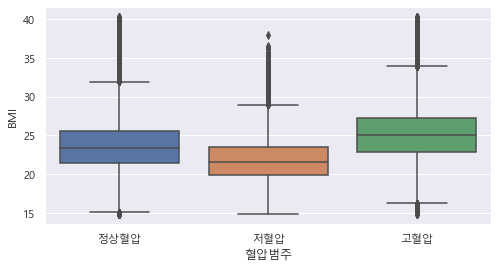

In [340]:
sns.boxplot(x = '혈압범주', y = 'BMI', data = df)

<AxesSubplot:xlabel='혈압범주', ylabel='BMI'>

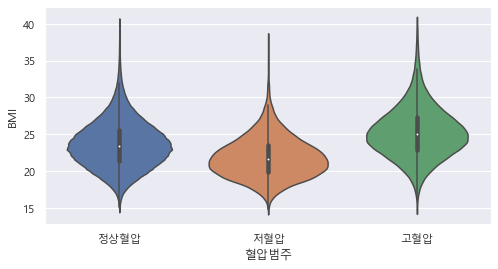

In [341]:
sns.violinplot(x = '혈압범주', y = 'BMI', data = df)

In [343]:
df.groupby('혈압범주')['BMI'].describe()

,count,mean,std,min,25%,50%,75%,max
혈압범주,,,,,,,,
고혈압,135324.0,25.242038,3.448873,14.8,22.9,25.0,27.3,40.3
저혈압,26782.0,21.835046,2.736182,14.8,19.9,21.6,23.5,38.0
정상혈압,837894.0,23.634720,3.213817,14.8,21.4,23.4,25.6,40.3


`-` 고혈압은 정상혈압보다 BMI가 평균적으로 1.6 크다 

`-` 정상혈압은 저혈압보다 BMI가 평균적으로 1.8 크다  

<AxesSubplot:xlabel='혈당범주', ylabel='BMI'>

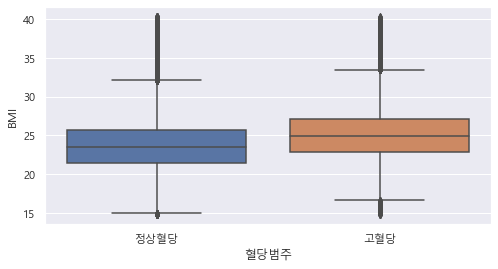

In [252]:
sns.boxplot(x = '혈당범주', y = 'BMI', data = df)

<AxesSubplot:xlabel='혈당범주', ylabel='BMI'>

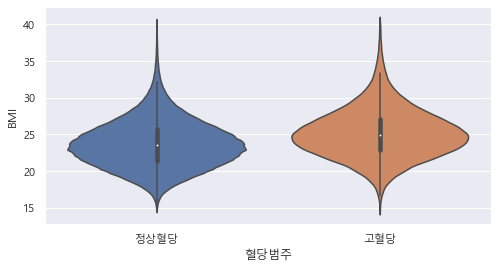

In [342]:
sns.violinplot(x = '혈당범주', y = 'BMI', data = df)

In [344]:
df.groupby('혈당범주')['BMI'].describe()

,count,mean,std,min,25%,50%,75%,max
혈당범주,,,,,,,,
고혈당,70954.0,25.168695,3.396526,14.8,22.9,24.9,27.1,40.3
정상혈당,929046.0,23.699806,3.266234,14.8,21.4,23.5,25.7,40.3


`-` 고혈당인 경우 정상혈당보다 BMI가 평균적으로 1.5정도 크다

`-` 여기까지 개별 양적변수에 대한 분포를 확인했다

`-` 그런데 수축기혈압과 이완기혈압같이 두 변수사이에 관계가 있을 수 있다

`-` 그렇기에 산점도를 그려 변수사이에 관계를 확인해보자

### 두 변수의 시각화

#### 상관관계 행렬

`-` 우선 양적변수간의 상관관계 행렬을 그려보자

In [70]:
corr_df = df.loc[:, ('수축기혈압', '이완기혈압', '공복혈당', 'BMI')]

In [71]:
corr_matrix = corr_df.corr(method = 'pearson') # 상관관계 행렬

In [72]:
corr_matrix

,수축기혈압,이완기혈압,공복혈당,BMI
수축기혈압,1.000000,0.743006,0.186501,0.304383
이완기혈압,0.743006,1.000000,0.138717,0.275492
공복혈당,0.186501,0.138717,1.000000,0.173688
BMI,0.304383,0.275492,0.173688,1.000000


<AxesSubplot:>

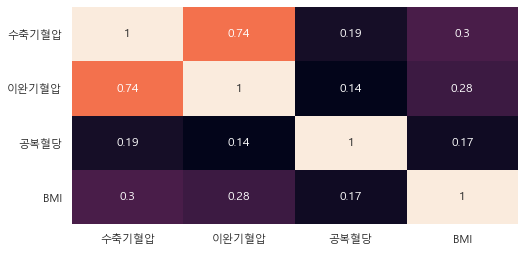

In [73]:
sns.heatmap(corr_matrix, annot = True, cbar = False)

`-` 수축기혈압과 이완기혈압은 상관계수가 0.74로 높고 나머지는 그저 그렇다

`-` 하지만 선형관계가 아닌 다른 관계가 있을수도 있으니 시각화하자

<AxesSubplot:xlabel='수축기혈압', ylabel='이완기혈압'>

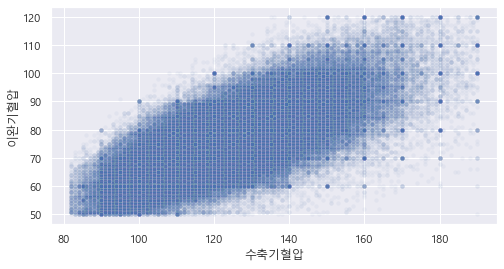

In [326]:
sns.scatterplot(x = '수축기혈압', y = '이완기혈압', alpha = 0.05, s = 20, data = df) 

`-` 문제가 있는데 관측치(점의 개수)가 너무 많아 시각화가 제대로 되지 않는다

`-` 전체의 1%(10000개) 정도만 무작위 추출하여 산점도를 그려보자

`-` 참고 : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html

In [34]:
np.random.seed(2021)
df_s = df.sample(frac = 0.01)

In [328]:
ft = df_s['고혈압_당뇨'].value_counts() 
rft = df_s['고혈압_당뇨'].value_counts() / len(df_s['고혈압_당뇨']) 
DIS_table2 = pd.DataFrame({'Freq': ft, 'Relative freq': rft})
DIS_table2

,Freq,Relative freq
4,7336,0.7336
2,1664,0.1664
1,560,0.0560
3,440,0.0440


`-` 원본과 비율이 거의 동일하다

`-` 새로운 데이터프레임을 사용해 시각화하자

#### 수축기혈압과 이완기혈압

<AxesSubplot:xlabel='수축기혈압', ylabel='이완기혈압'>

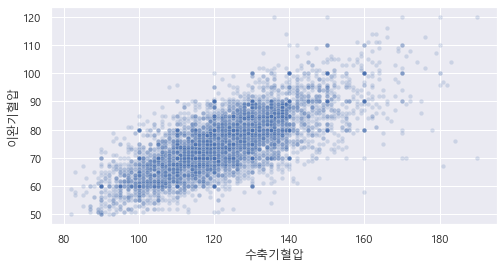

In [309]:
sns.scatterplot(x = '수축기혈압', y = '이완기혈압', alpha = 0.2, s = 20, data = df_s)  

`-` 수축기혈압은 90\~140, 이완기 혈압은 60\~90사이에 데이터가 많이 몰려있다

`-` 사실 시각화의 목적은 고혈압_당뇨 진료내역에 따른 사람들의 특성을 알고싶은 것이었다

`-` 그렇기에 고혈압_당뇨 진료내역을 색깔변수로 하여 산점도를 그려보자

<AxesSubplot:xlabel='수축기혈압', ylabel='이완기혈압'>

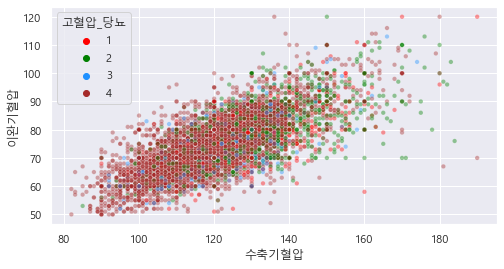

In [315]:
palette = ['red', 'green', 'dodgerblue', 'brown']
sns.scatterplot(x = '수축기혈압', y = '이완기혈압', hue = '고혈압_당뇨', s = 20, palette = palette, alpha = 0.4, data = df_s)  

`-` 고혈압, 당뇨 둘 다 진료내역이 없는 경우가 너무 많아 그림이 제대로 보이지 않는다(파란점은 안보인다)

`-` 고혈압, 당뇨 둘 다 진료내역이 없는 경우는 따로 그리자

In [36]:
df_s2 = df_s.loc[df_s['고혈압_당뇨'] != 4, :]

In [37]:
df_s3 = df_s.loc[df_s['고혈압_당뇨'] == 4, :]

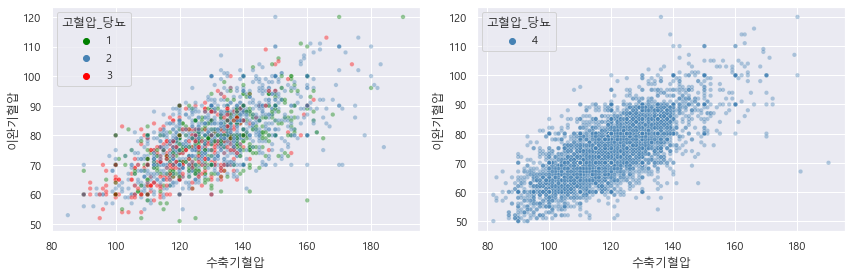

In [316]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(12)

palette2 = ['green', 'steelblue', 'red']
sns.scatterplot(data = df_s2, x = '수축기혈압', y = '이완기혈압', hue = '고혈압_당뇨', alpha = 0.4, s = 20, palette = palette2, ax = ax1)
sns.scatterplot(data = df_s3, x = '수축기혈압', y = '이완기혈압', hue = '고혈압_당뇨', alpha = 0.4, s = 20, palette = ['steelblue'], ax = ax2)

fig.tight_layout()

`-` 고혈압, 당뇨병 둘다 없는 사람들의 경우 수축기혈압은 80\~140, 이완기 혈압은 50\~90사이에 데이터가 많이 몰려있다

`-` 우선 고혈압_당뇨가 2(고혈압만)인 경우와 1(둘 다 있음)인 경우 비슷한 산점도를 보인다

`-` 그런데 고혈압_당뇨가 3(당뇨만)인 경우 고혈압_당뇨가 1,2인 경우보다 이완기혈압과 수축기혈압이 낮은쪽에 점이 위치하고 있음을 알 수 있다

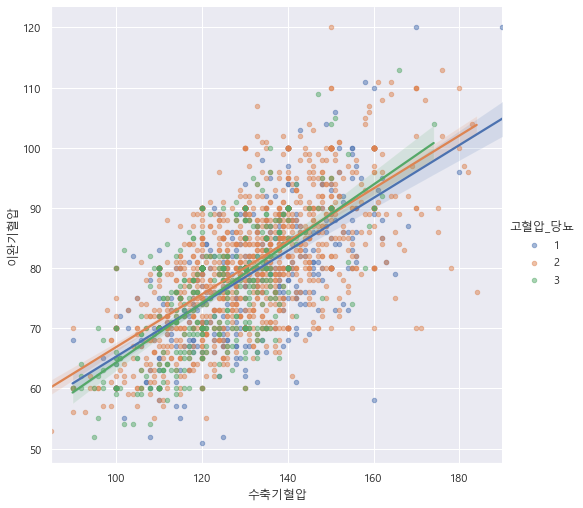

In [323]:
sns.lmplot(x = '수축기혈압', y = '이완기혈압', hue = '고혈압_당뇨', scatter_kws = {'alpha':0.5, 's':20}, height = 7, data = df_s2)

`-` 추세선을 그려보니 고혈압,당뇨 진료내역과는 별개로 수축기혈압과 이완기혈압은 양의 상관관계 보인다 

`-` `맥압을 size변수로 설정하면 좋을것 같다`

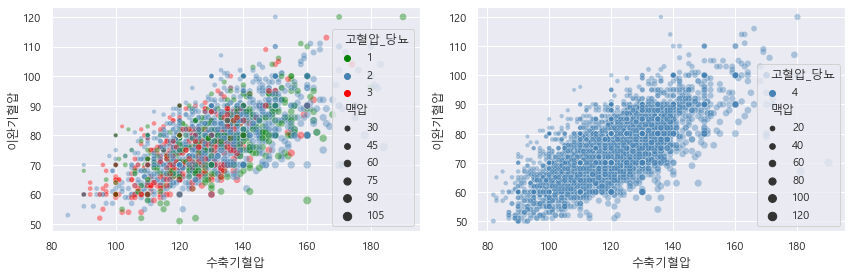

In [38]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(12)

palette2 = ['green', 'steelblue', 'red']
sns.scatterplot(data = df_s2, x = '수축기혈압', y = '이완기혈압', hue = '고혈압_당뇨', size = '맥압', alpha = 0.4, palette = palette2, ax = ax1)
sns.scatterplot(data = df_s3, x = '수축기혈압', y = '이완기혈압', hue = '고혈압_당뇨', size = '맥압', alpha = 0.4, palette = ['steelblue'], ax = ax2)

fig.tight_layout()

#### 수축기혈압과 공복혈당

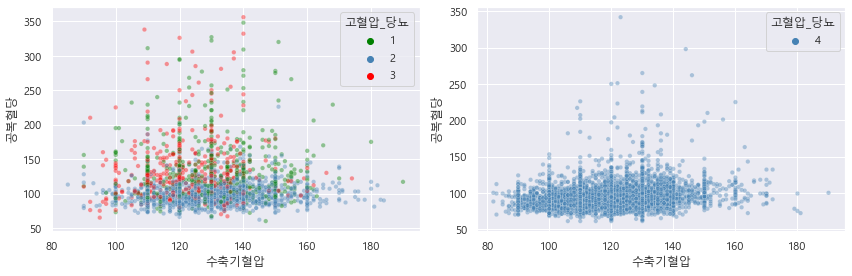

In [329]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(12)

palette2 = ['green', 'steelblue', 'red']
sns.scatterplot(data = df_s2, x = '수축기혈압', y = '공복혈당', hue = '고혈압_당뇨', alpha = 0.4, s = 20, palette = palette2, ax = ax1)
sns.scatterplot(data = df_s3, x = '수축기혈압', y = '공복혈당', hue = '고혈압_당뇨', alpha = 0.4, s = 20, palette = ['steelblue'], ax = ax2)

fig.tight_layout()

`-` 고혈압, 당뇨 둘 다 없는 경우 산점도를 보면 공복혈당은 60\~140 수축기혈압은 90\~150사이에 대부분의 데이터가 존재한다

`-` 당뇨는 없고 고혈압만 있는 경우 확실히 당뇨가 있는 경우보다 공복혈당이 낮은곳에 데이터가 분포함을 확인할 수 있다

`-` 고혈압만 있는 경우는 고혈압, 당뇨 둘 다 없는 경우의 산점도와 비슷하다

`-` 당뇨가 있다면 추가로 고혈압이 있다고해서 산점도가 달라지지는 않는것으로 보이며 둘이 비슷하다

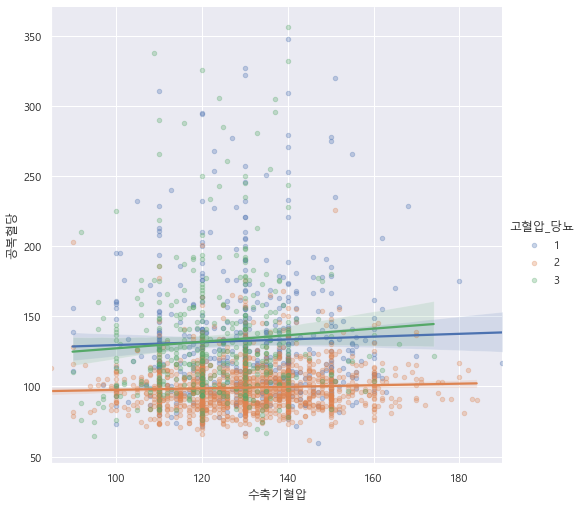

In [330]:
sns.lmplot(x = '수축기혈압', y = '공복혈당', hue = '고혈압_당뇨', scatter_kws = {'alpha':0.3, 's':20}, height = 7, data = df_s2)

`-` 추세선을 그려보면 당뇨유무에 따른 차이가 확실히 보인다

`-` 당뇨가 없다면 공복혈당은 확실히 낮다

`-` 당뇨는 혈당으로 판단하기에 당연한 결과이긴 하다

#### 수축기혈압과 BMI

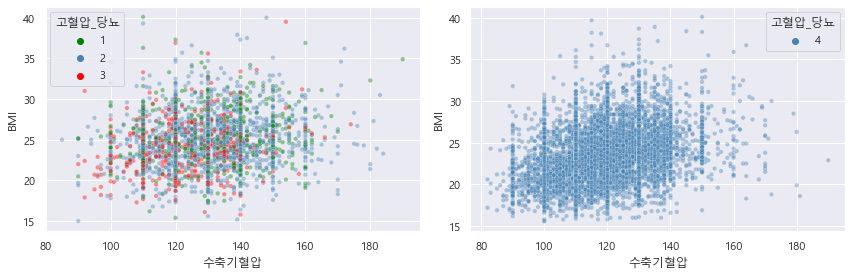

In [331]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(12)

palette2 = ['green', 'steelblue', 'red']
sns.scatterplot(data = df_s2, x = '수축기혈압', y = 'BMI', hue = '고혈압_당뇨', alpha = 0.4, s = 20, palette = palette2, ax = ax1)
sns.scatterplot(data = df_s3, x = '수축기혈압', y = 'BMI', hue = '고혈압_당뇨', alpha = 0.4, s = 20, palette = ['steelblue'], ax = ax2)

fig.tight_layout()

`-` 고혈압, 당뇨 둘 다 없는 경우 산점도를 보면 BMI은 17\~30 수축기혈압은 90\~150사이에 대부분의 데이터가 존재하며 병이 있는 경우보다 BMI와 수축기혈압이 낮은곳에 더 많은 데이터가 분포한다

`-` 산점도를 보면 당뇨만 있는 경우 수축기혈압이 낮은 곳에 데이터가 분포하고 있으며 BMI도 고혈압이 있는 경우보다 낮은 곳에 분포함을 알 수 있다

`-` 당뇨만 있는 경우 수축기혈압은 90\~140, BMI는 17\~30사이에 데이터가 몰려있다

`-` 고혈압이 있는 경우에는 수축기혈압은 100\~160, BMI는 17\~33사이에 데이터가 몰려있다 

`-` 고혈압만 있는 경우와 둘 다 있는 경우의 산점도는 서로 유사하다

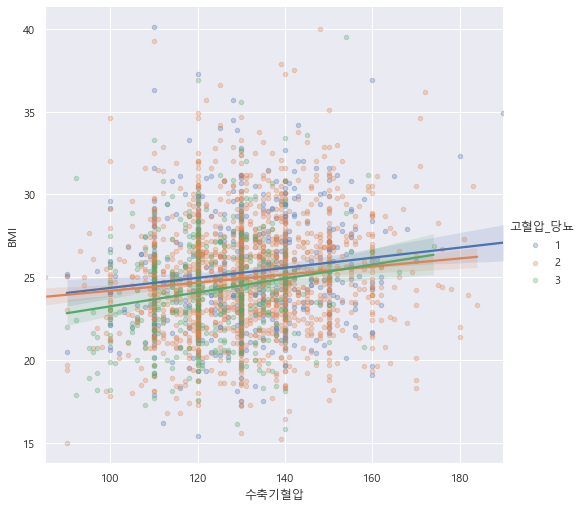

In [332]:
sns.lmplot(x = '수축기혈압', y = 'BMI', hue = '고혈압_당뇨', scatter_kws = {'alpha':0.3, 's':20}, height = 7, data = df_s2)

`-` 추세선을 그려보면 약한 양의 상관관계가 있긴하다

`-` 당뇨만 있는 경우 추세선의 기울기 조금더 가파르다

`-` 당뇨만 있는 경우의 데이터가가 고혈압이 있는 경우의 데이터보다 덜 퍼져있어서 그런것으로 보인다 

#### 이완기혈압과 공복혈당

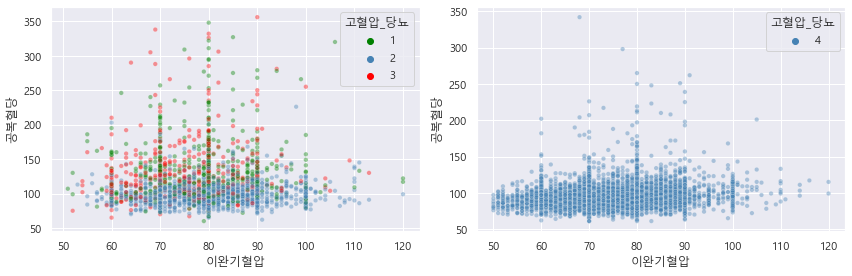

In [333]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(12)

palette2 = ['green', 'steelblue', 'red']
sns.scatterplot(data = df_s2, x = '이완기혈압', y = '공복혈당', hue = '고혈압_당뇨', alpha = 0.4, s = 20, palette = palette2, ax = ax1)
sns.scatterplot(data = df_s3, x = '이완기혈압', y = '공복혈당', hue = '고혈압_당뇨', alpha = 0.4, s = 20, palette = ['steelblue'], ax = ax2)

fig.tight_layout()

`-` 고혈압, 당뇨 둘 다 없는 경우 산점도를 보면 공복혈당은 60\~140 이완기혈압은 50\~90사이에 대부분의 데이터가 존재한다

`-` 당뇨는 없고 고혈압만 있는 경우 확실히 당뇨가 있는 경우보다 공복혈당이 낮은곳에 데이터가 분포함을 확인할 수 있다

`-` 고혈압만 있는 경우는 고혈압, 당뇨 둘 다 없는 경우의 산점도와 비슷하다

`-` 당뇨가 있다면 추가로 고혈압이 있다고해서 산점도가 달라지지는 않는것으로 보이며 둘이 비슷하다

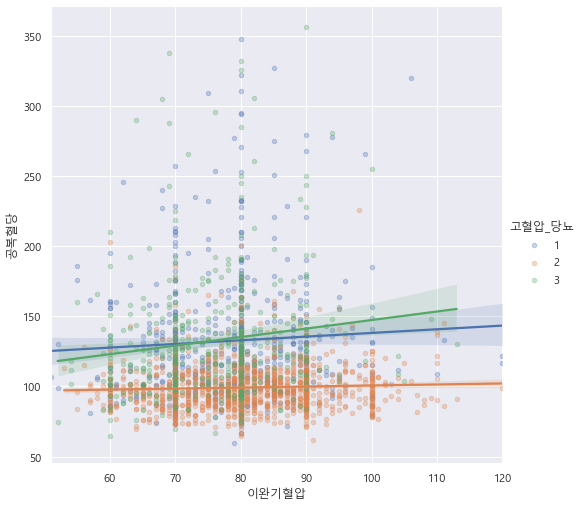

In [334]:
sns.lmplot(x = '이완기혈압', y = '공복혈당', hue = '고혈압_당뇨', scatter_kws = {'alpha':0.3, 's':20}, height = 7, data = df_s2)

`-` 추세선을 그려보면 당뇨유무에 따른 차이가 확실히 보인다

`-` 당뇨가 없다면 공복혈당은 확실히 낮다

`-` 이완기혈압은 혈압의 일종이며 상관관계도 높기에 수축기혈압과 거의 동일한 양상을 보였다

#### 이완기혈압과 BMI

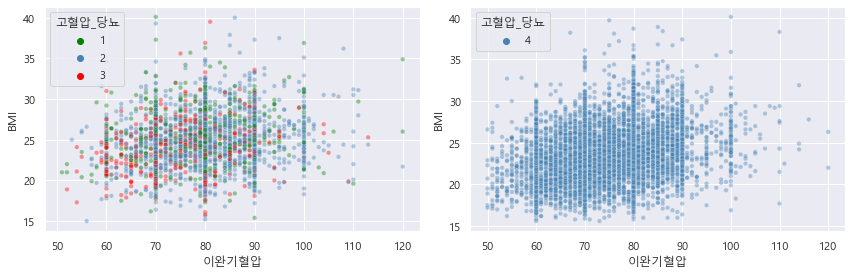

In [335]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(12)

palette2 = ['green', 'steelblue', 'red']
sns.scatterplot(data = df_s2, x = '이완기혈압', y = 'BMI', hue = '고혈압_당뇨', alpha = 0.4, s = 20, palette = palette2, ax = ax1)
sns.scatterplot(data = df_s3, x = '이완기혈압', y = 'BMI', hue = '고혈압_당뇨', alpha = 0.4, s = 20, palette = ['steelblue'], ax = ax2)

fig.tight_layout()

`-` 고혈압, 당뇨 둘 다 없는 경우 산점도를 보면 BMI은 16\~30 이완기혈압은 55\~90사이에 대부분의 데이터가 존재하며 병이 있는 경우보다 BMI와 이완기혈압이 낮은곳에 더 많은 데이터가 분포한다

`-` 산점도를 보면 당뇨만 있는 경우 이완기혈압이 낮은 곳에 데이터가 분포하고 있으며 BMI도 고혈압이 있는 경우보다 낮은 곳에 분포함을 알 수 있다

`-` 당뇨만 있는 경우 이완기혈압은 60\~90, BMI는 17\~28사이에 데이터가 몰려있다

`-` 고혈압이 있는 경우에는 이완기혈압은 60\~100, BMI는 17\~33사이에 데이터가 몰려있다 

`-` 고혈압만 있는 경우와 둘 다 있는 경우의 산점도는 서로 유사하다

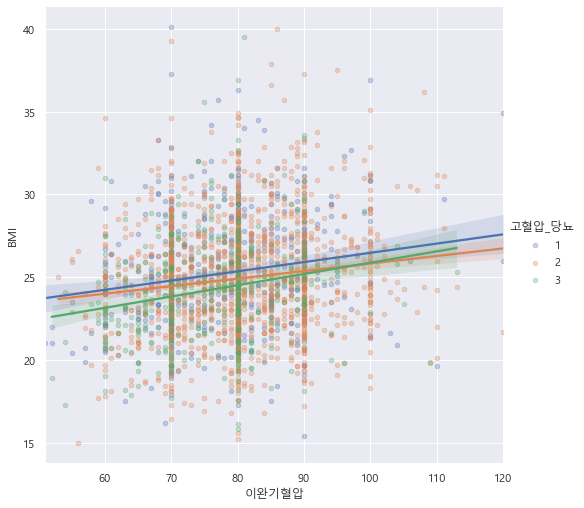

In [336]:
sns.lmplot(x = '이완기혈압', y = 'BMI', hue = '고혈압_당뇨', scatter_kws = {'alpha':0.3, 's':20}, height = 7, data = df_s2)

`-` 추세선을 그려보면 약한 양의 상관관계가 있긴하다

`-` 당뇨만 있는 경우 추세선의 기울기 조금더 가파르다

`-` 당뇨만 있는 경우의 데이터가가 고혈압이 있는 경우의 데이터보다 덜 퍼져있어서 그런것으로 보인다 

`-` 이완기혈압과 BMI의 산점도는 수축기혈압과 BMI의 산점도와 비슷한 양상을 보였다

#### 공복혈당과 BMI

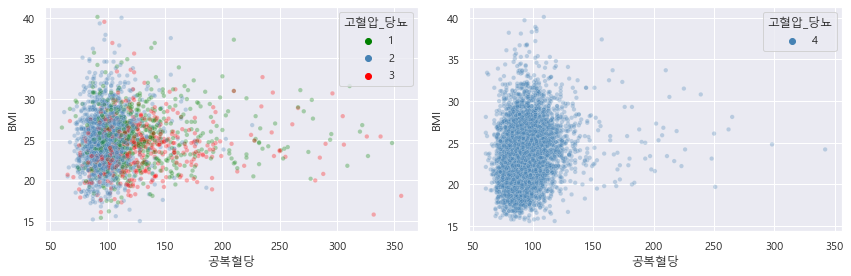

In [337]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(12)

palette2 = ['green', 'steelblue', 'red']
sns.scatterplot(data = df_s2, x = '공복혈당', y = 'BMI', hue = '고혈압_당뇨', alpha = 0.3, s = 20, palette = palette2, ax = ax1)
sns.scatterplot(data = df_s3, x = '공복혈당', y = 'BMI', hue = '고혈압_당뇨', alpha = 0.3, s = 20, palette = ['steelblue'], ax = ax2)

fig.tight_layout()

`-` 우선 고혈압, 당뇨가 없는 산점도를 보면 BMI는 16\~33, 공복혈당은 60\~130인 구간에 대부분의 데이터가 존재함을 알 수 있다 

`-` 당뇨 진료내역 유무에 따라 공복혈당에는 큰 차이가 있다

`-` 고혈압만 있는 경우에 그렇지않은 경우보다 BMI가 더 넓게 퍼져있다

`-` 당뇨만 있는 경우에는 BMI가 조금 더 좁게 퍼져있는 것으로 보인다

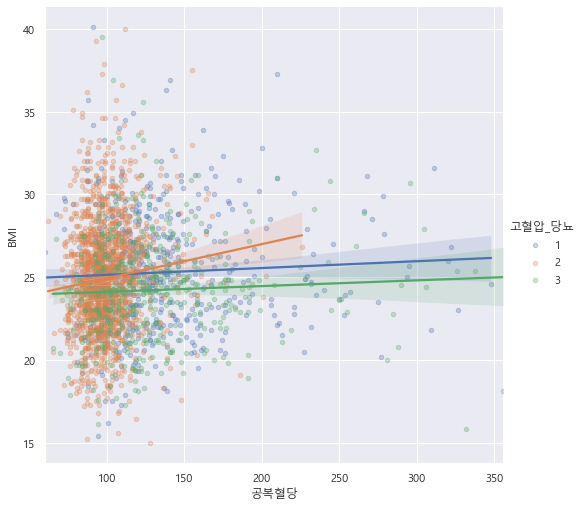

In [338]:
sns.lmplot(x = '공복혈당', y = 'BMI', hue = '고혈압_당뇨', scatter_kws = {'alpha':0.3, 's':20}, height = 7, data = df_s2)

`-` 추세선을 그려보면 당뇨 진료내역만 있는 경우에는 약한 양의상관관계가 있는 것으로 보여진다

`-` 그 외에 경우에는 BMI와 공복혈당은 관계가 없는 것으로 보인다

`-` 고혈압/당뇨 범주에 따라 상관계수 행렬을 그려보자

`-` `catplot을 사용하여 고혈압/당뇨에 따른 FacetGrid를 그려보자`

`-` 해볼 시각화 

`-` 혈압 구간으로 cut하여 다른 변수와의 관계 확인

`-` 양적 변수간의 상관관계 확인

`-` 남여별로 차이가 있는지 확인 등등

`-` 연령대별 고혈압/당뇨

`-` 고혈압/당뇨 도수분포표

- 스토리와 흐름, motivation 이 중요함

- 이런 그림을 왜그리고 또 이건 왜했는지

- 왜 이런 시각화나 분석을 하고 다음에는 이러한 시각화나 분석을 했는지 등

`-` 수축기혈압 분포를 그려보니 봉우리가 많았음

`-` 고혈압/당뇨 진료내역에 따라 분포가 달라 그러한 것 같아 이에 따른 boxplot그림

`-` 그런데 각 분포마다 여러개의 봉우리가 있었음

`-` 뭐 때문에 그런걸까?

`-` 여러개 히스토그램의 x축이 동일하면 가로로 그리는 것 보다 세로로 그리는것이 분포비교에 더 좋음

`-` BMI 저체중, 정상, 과체중, 비만으로 쪼개서 분석해보기